Mounted at /content/drive


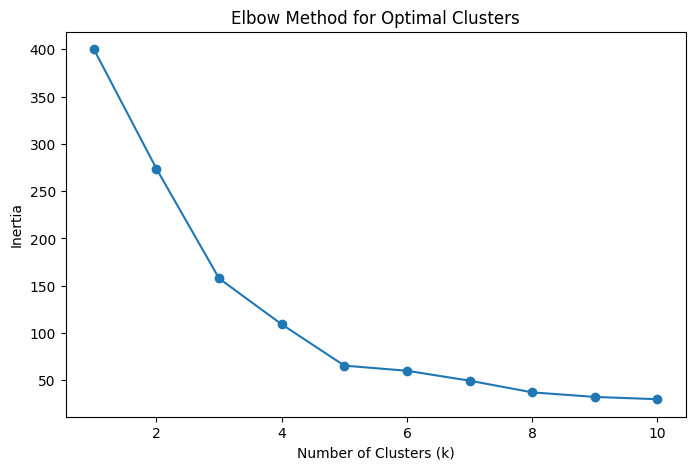

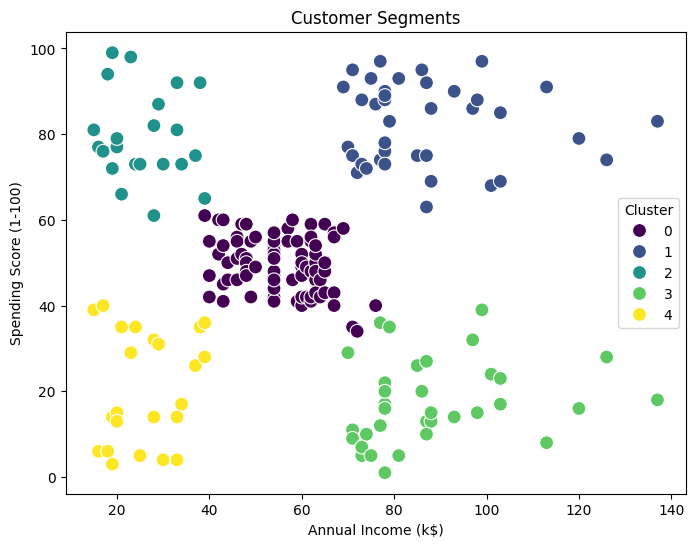

Centroids (Original Scale):
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Mall_Customers.csv')  # Replace with your file path

# Data Preprocessing
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine Optimal Clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Analyze Results
centroids = kmeans.cluster_centers_
original_centroids = scaler.inverse_transform(centroids)
print("Centroids (Original Scale):")
print(original_centroids)
